In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy as np


import scipy.optimize as optimization
from scipy import stats
from scipy.stats import norm
import matplotlib.dates as mdates

from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

from IPython.display import HTML
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import datetime
# from datetime import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [2]:
#Read in data
infile_7 = 'data/7-6-2021'
infile_8 = 'data/8-6-2021'
infile_Xe_fill = 'data/11-5-2021'

indata_7 = open(infile_7)
indata_8 = open(infile_8)
indata_Xefill = open(infile_Xe_fill)

p_det = []
p_low = []
p_high = []
time_stamp = []
unix_time = []
count = 0
flowrate = []
df = []
tijd = []
temp_15 = []

for line in indata_7:
    
    aa = line.split()
    a  = [ahelp.replace(',','.') for ahelp in aa] 
    df.append(a)
    
    if len(a) == 43: # I had to change this value because now we also print the GCF
        
        p_det.append(float(a[24]))
        p_low.append(float(a[25]))
        p_high.append(float(a[26]))
        flowrate.append(float(a[27]))
#         temp_15.append(float[a[16]])

        tijd.append(a[1])
        a1 = a[0].split('-')
        a2 = a[1].split(':')

        time = datetime.datetime(int(a1[2]),int(a1[1]),int(a1[0]),
                                 int(a2[0]),int(a2[1]),int(a2[2])).timestamp()
        
        if count == 0: start_time = time
        time_stamp.append(time-start_time)
        unix_time.append(time)
        count = count +1

#print(tijd)

p_det2 = []
p_low2 = []
p_high2 = []
time_stamp2 = []
unix_time2 = []
count2 = 0
flowrate2 = []
df2 = []
tijd2 = []
temp_15_2 = []

for line in indata_8:
    
    aa2 = line.split()
    a_  = [ahelp2.replace(',','.') for ahelp2 in aa2] 
    df2.append(a_)
    
    if len(a_) == 43: # I had to change this value because now we also print the GCF
        
        p_det2.append(float(a_[24]))
        p_low2.append(float(a_[25]))
        p_high2.append(float(a_[26]))
        flowrate2.append(float(a_[27]))
#         temp_15.append(float[a[16]])

        tijd2.append(a_[1])
        a1_ = a_[0].split('-')
        a2_ = a_[1].split(':')

        time2 = datetime.datetime(int(a1_[2]),int(a1_[1]),int(a1_[0]),
                                 int(a2_[0]),int(a2_[1]),int(a2_[2])).timestamp()
        
        if count2 == 0: start_time2 = time2
        time_stamp2.append(time2-start_time2)
        unix_time2.append(time2)
        count2 = count2 +1
#print(tijd)

p_det3 = []
p_low3 = []
p_high3 = []
time_stamp3 = []
unix_time3 = []
count3 = 0
flowrate3 = []
df3 = []
tijd3 = []
temp_15_3 = []

for line in indata_Xefill:
    
    aa3 = line.split()
    a_3 = [ahelp3.replace(',','.') for ahelp3 in aa3] 
    df3.append(a_3)
    
    if len(a_3) == 43: # I had to change this value because now we also print the GCF
        
        p_det3.append(float(a_3[24]))
        p_low3.append(float(a_3[25]))
        p_high3.append(float(a_3[26]))
        flowrate3.append(float(a_3[27]))
#         temp_15.append(float[a[16]])

        tijd3.append(a_3[1])
        a1_3 = a_3[0].split('-')
        a2_3 = a_3[1].split(':')

        time3 = datetime.datetime(int(a1_3[2]),int(a1_3[1]),int(a1_3[0]),
                                 int(a2_3[0]),int(a2_3[1]),int(a2_3[2])).timestamp()
        
        if count3 == 0: start_time3 = time3
        time_stamp3.append(time3-start_time3)
        unix_time3.append(time3)
        count3 = count3 +1
#print(tijd)

In [3]:
# HOURS OF MEASUREMENT LIST
#---------------------------------------------------------------------------------------------------------------------------------

from datetime import datetime

time_list = []
for x in unix_time:
    dt_object = datetime.fromtimestamp(x)
    #print(dt_object)
    time_list.append(dt_object)
#print(time_list)

time_list2 = []
for x in unix_time2:
    dt_object2 = datetime.fromtimestamp(x)
    #print(dt_object)
    time_list2.append(dt_object2)
#print(time_list)

time_list3 = []
for x in unix_time3:
    dt_object3 = datetime.fromtimestamp(x)
    #print(dt_object)
    time_list3.append(dt_object3)
#print(time_list)

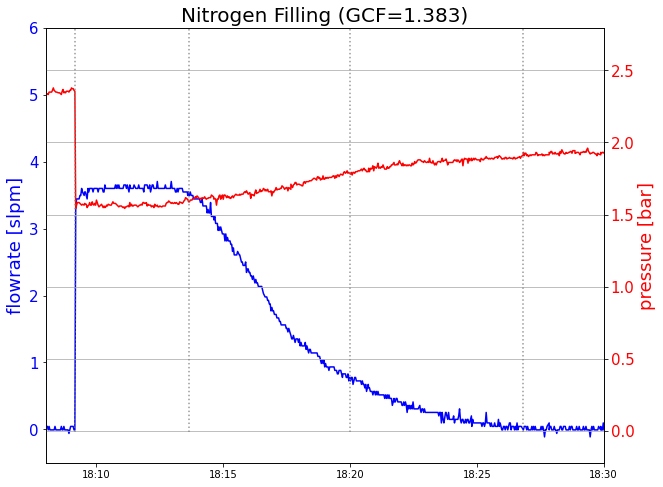

In [92]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list, flowrate, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftNi_ = dt.datetime(2021, 6, 7, 18, 8)
rightNi_ = dt.datetime(2021, 6, 7, 18, 30)

plt.gca().set_xbound(leftNi_, rightNi_)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list, p_low, color='red')
myFmt = mdates.DateFormatter('%H:%M')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftNi_, rightNi_)
plt.yticks(fontsize = 15, color='red')

x_00 = dt.datetime(2021, 6, 7, 18, 9,9)
x_11 = dt.datetime(2021, 6, 7, 18, 13,40)
x_22 = dt.datetime(2021, 6, 7, 18, 20)
x_33 = dt.datetime(2021, 6, 7, 18, 26,50)

plt.axvline(x_00, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dotted')
plt.axvline(x_11, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dotted')
plt.axvline(x_22, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dotted')
plt.axvline(x_33, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dotted')

plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right')

plt.title('Nitrogen Filling (GCF=1.383)', fontsize = 20)

plt.grid()
plt.savefig("N2_filling_1.383.png")

plt.show()

In [5]:
################################################################################################################################
#Integrated and mean flow Calculation Function
################################################################################################################################
def integrated_flow(x_values, y_values, lb, ub): 
    
    integrated_flow = []
    print(f'left bound is {lb}, right bound is {ub}')
    dt = ub.timestamp() - lb.timestamp()
    print(dt)
    
    for count, value in enumerate(y_values): 
        #print(count,value)
        if x_values[count] >= lb and x_values[count] <= ub: 
            integrated_flow.append(y_values[count])
    
    mean_flow = (sum(integrated_flow)/dt)
    result_flow = (sum((integrated_flow)*2)/60)
    print(f'Integrated flow: {result_flow} SL')
    print(f'Mean flow: {mean_flow} slpm')
    res = [result_flow, mean_flow]
    
    return res

In [6]:
################################################################################################################################
#Delta p Calculation
################################################################################################################################
def delta_p(x_values, y_values, lb, ub, p_values): 
    
    integrated_flow = []
    p_sum = []
    print(f'left bound is {lb}, right bound is {ub}')
    dt = ub.timestamp() - lb.timestamp()
    print(dt)
    
    for count, value in enumerate(y_values): 
        #print(count,value)
        if x_values[count] >= lb and x_values[count] <= ub:             
            integrated_flow.append(y_values[count])
            p_sum.append(p_values[count])
    
    p_max = p_sum[0]
    p_min = p_sum[-1]
    delta_p = p_max - p_min
    p_res = [p_max, p_min, delta_p]
    print(f'P start = {p_max} bar')
    print(f'P end = {p_min} bar')
    print(f'delta_p is = {delta_p} bar')
    
    return p_res

In [7]:
new_flowrate = []

for i in range(0, len(flowrate)):
    new_flowrate.append(flowrate[i]*1.383)

In [8]:
p_ress = delta_p(time_list, new_flowrate, x_00, x_33, p_low)

left bound is 2021-06-07 18:09:09, right bound is 2021-06-07 18:26:50
1061.0
P start = 2.355 bar
P end = 1.931 bar
delta_p is = 0.42399999999999993 bar


In [9]:
result_ = []
result2_ = []
result3_ = []
print(f'Nitrogen result (GCF=1.383)')
print(f'First interval:')
result_ = integrated_flow(time_list, new_flowrate, x_00, x_11)
print(f'Second interval:')
result2_ = integrated_flow(time_list, new_flowrate, x_11, x_22)
print(f'Third interval:')
result3_ = integrated_flow(time_list, new_flowrate, x_22, x_33)
print(f'\nTot result')
tot_int_flow_ = result_[0] + result2_[0] + result3_[0]
tot_mean_flow_ = result_[1] + result2_[1] + result3_[1]
print(f'Integrated flow: {tot_int_flow_} [SL], mean flow: {tot_mean_flow_} [slpm] ')

Nitrogen result (GCF=1.383)
First interval:
left bound is 2021-06-07 18:09:09, right bound is 2021-06-07 18:13:40
271.0
Integrated flow: 22.005005199999953 SL
Mean flow: 2.435978435424356 slpm
Second interval:
left bound is 2021-06-07 18:13:40, right bound is 2021-06-07 18:20:00
380.0
Integrated flow: 17.21447760000002 SL
Mean flow: 1.3590377052631586 slpm
Third interval:
left bound is 2021-06-07 18:20:00, right bound is 2021-06-07 18:26:50
410.0
Integrated flow: 2.628161 SL
Mean flow: 0.19230446341463395 slpm

Tot result
Integrated flow: 41.84764379999997 [SL], mean flow: 3.9873206041021483 [slpm] 


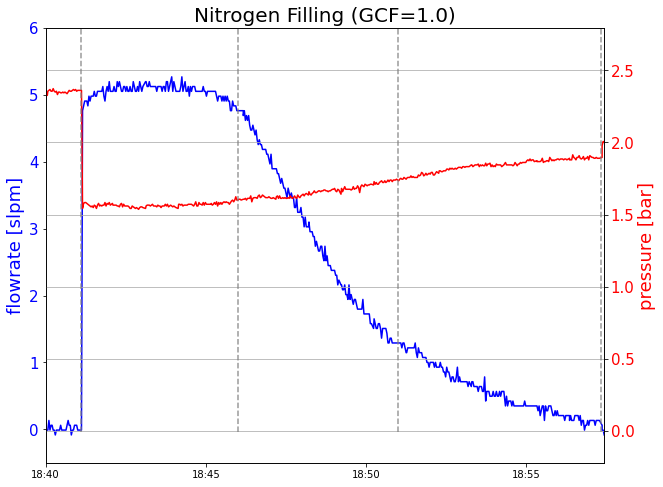

In [93]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list, flowrate, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftNi2 = dt.datetime(2021, 6, 7, 18, 40)
rightNi2 = dt.datetime(2021, 6, 7, 18,57,25)

plt.gca().set_xbound(leftNi2, rightNi2)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list, p_low, color='red')
myFmt = mdates.DateFormatter('%H:%M')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftNi2, rightNi2)
plt.yticks(fontsize = 15, color='red')

x_0 = dt.datetime(2021, 6, 7, 18, 41,7)
x_1 = dt.datetime(2021, 6, 7, 18, 46)
x_2 = dt.datetime(2021, 6, 7, 18, 51)
x_3 = dt.datetime(2021, 6, 7, 18, 57,20)


plt.axvline(x_0, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')
plt.axvline(x_1, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')
plt.axvline(x_2, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')
plt.axvline(x_3, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')


plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right')

plt.title('Nitrogen Filling (GCF=1.0)', fontsize = 20)

plt.grid()
plt.savefig("N2_filling_1.png")

plt.show()

In [11]:
p_ressNi2 = delta_p(time_list, flowrate, x_0, x_3, p_low)

left bound is 2021-06-07 18:41:07, right bound is 2021-06-07 18:57:20
973.0
P start = 2.361 bar
P end = 1.89 bar
delta_p is = 0.4710000000000003 bar


In [12]:
result = []
result2 = []
result3 = []
print(f'Nitrogen result')
print(f'First interval:')
result = integrated_flow(time_list, flowrate, x_0, x_1)
print(f'Second interval:')
result2 = integrated_flow(time_list, flowrate, x_1, x_2)
print(f'Third interval:')
result3 = integrated_flow(time_list, flowrate, x_2, x_3)
print(f'\nTot result')
tot_int_flow = result[0] + result2[0] + result3[0]
tot_mean_flow = result[1] + result2[1] + result3[1]
print(f'Integrated flow: {tot_int_flow} [SL], mean flow: {tot_mean_flow} [slpm] ')

Nitrogen result
First interval:
left bound is 2021-06-07 18:41:07, right bound is 2021-06-07 18:46:00
293.0
Integrated flow: 24.234599999999993 SL
Mean flow: 2.4813583617747503 slpm
Second interval:
left bound is 2021-06-07 18:46:00, right bound is 2021-06-07 18:51:00
300.0
Integrated flow: 14.11696666666668 SL
Mean flow: 1.4116966666666668 slpm
Third interval:
left bound is 2021-06-07 18:51:00, right bound is 2021-06-07 18:57:20
380.0
Integrated flow: 3.507433333333326 SL
Mean flow: 0.2769026315789471 slpm

Tot result
Integrated flow: 41.858999999999995 [SL], mean flow: 4.169957660020364 [slpm] 


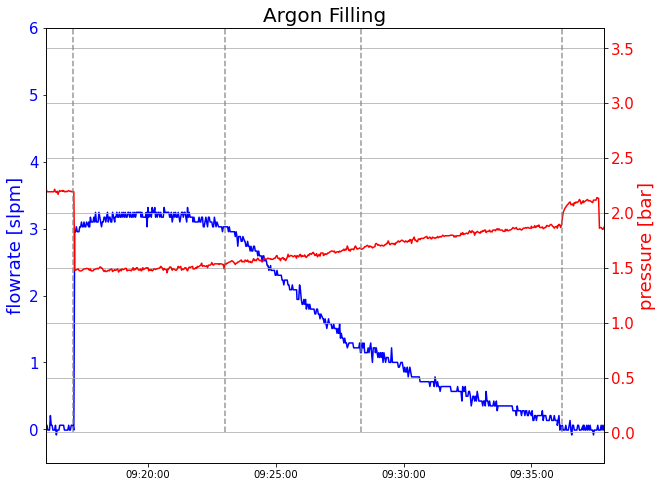

In [95]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list2, flowrate2, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftAr = dt.datetime(2021, 6, 8, 9, 16)
rightAr = dt.datetime(2021, 6, 8, 9,37,50)

plt.gca().set_xbound(leftAr, rightAr)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list2, p_low2, color='red')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftAr, rightAr)
plt.yticks(fontsize = 15, color='red')

x_0Ar = dt.datetime(2021, 6, 8, 9, 17,5)
x_1Ar = dt.datetime(2021, 6, 8, 9, 23)
x_2Ar = dt.datetime(2021, 6, 8, 9, 28,20)
x_3Ar = dt.datetime(2021, 6, 8, 9, 36,13)

plt.axvline(x_0Ar, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')
plt.axvline(x_1Ar, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')
plt.axvline(x_2Ar, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')
plt.axvline(x_3Ar, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')

plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right',fontsize = '14')

plt.title('Argon Filling', fontsize = 20)

plt.grid()
plt.savefig("Argon_filling.png")

plt.show()

In [14]:
p_ressAr = delta_p(time_list2, flowrate2, x_0Ar, x_3Ar, p_low2)

left bound is 2021-06-08 09:17:05, right bound is 2021-06-08 09:36:13
1148.0
P start = 2.193 bar
P end = 1.954 bar
delta_p is = 0.2390000000000001 bar


In [15]:
resultAr = []
resultAr2 = []
resultAr3 = []

print(f'Argon result')
print(f'First interval:')
resultAr = integrated_flow(time_list2, flowrate2, x_0Ar, x_1Ar)
print(f'Second interval:')
resultAr2 = integrated_flow(time_list2, flowrate2, x_1Ar, x_2Ar)
print(f'Third interval:')
resultAr3 = integrated_flow(time_list2, flowrate2, x_2Ar, x_3Ar)

tot_int_flowAr = resultAr[0] + resultAr2[0] + resultAr3[0]
tot_mean_flowAr = resultAr[1] + resultAr2[1] + resultAr3[1]
print(f'\nTot result')
print(f'Integrated flow: {tot_int_flowAr} [SL], mean flow: {tot_mean_flowAr} [slpm] ')

Argon result
First interval:
left bound is 2021-06-08 09:17:05, right bound is 2021-06-08 09:23:00
355.0
Integrated flow: 18.16713333333344 SL
Mean flow: 1.5352507042253531 slpm
Second interval:
left bound is 2021-06-08 09:23:00, right bound is 2021-06-08 09:28:20
320.0
Integrated flow: 10.998033333333364 SL
Mean flow: 1.0310656250000003 slpm
Third interval:
left bound is 2021-06-08 09:28:20, right bound is 2021-06-08 09:36:13
473.0
Integrated flow: 4.550733333333333 SL
Mean flow: 0.2886300211416486 slpm

Tot result
Integrated flow: 33.71590000000013 [SL], mean flow: 2.854946350367002 [slpm] 


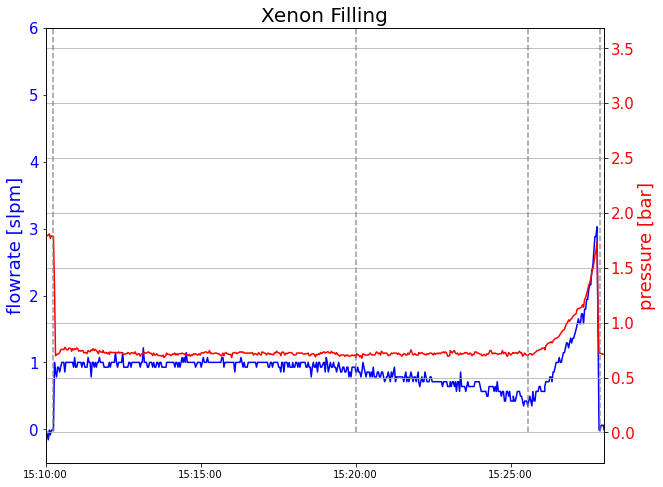

In [96]:
import datetime as dt

figure, ax = plt.subplots(figsize=(10, 8))

plt.plot(time_list2, flowrate2, color='blue')

#myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)

# Set X range. Using left and right variables makes it easy to change the range.
leftXe = dt.datetime(2021, 6, 8, 15, 10)
rightXe = dt.datetime(2021, 6, 8, 15, 28)

plt.gca().set_xbound(leftXe, rightXe)
plt.ylim(-0.5,6)

ax.set_ylabel('flowrate [slpm]', color='blue', fontsize=18) 
plt.yticks(fontsize = 15, color='blue')

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('pressure [bar]', color='red', fontsize=18)  # we already handled the x-label with ax1
ax2.plot(time_list2, p_low2, color='red')
myFmt = mdates.DateFormatter('%H:%M:%S')
ax2.xaxis.set_major_formatter(myFmt)
plt.gca().set_xbound(leftXe, rightXe)
plt.yticks(fontsize = 15, color='red')

x_0Xe = dt.datetime(2021, 6, 8, 15, 10, 15)
x_1Xe = dt.datetime(2021, 6, 8, 15, 20)
x_2Xe = dt.datetime(2021, 6, 8, 15, 25,33)
x_3Xe = dt.datetime(2021, 6, 8, 15, 27,52)

plt.axvline(x_0Xe, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')
plt.axvline(x_1Xe, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')
plt.axvline(x_2Xe, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')
plt.axvline(x_3Xe, 0.07, 6, label='pyplot vertical line', color='grey',alpha=0.8,linestyle='dashed')

plt.xlabel('time [s]',fontsize=18)
#plt.legend(loc='upper right',fontsize = '14')

plt.title('Xenon Filling', fontsize = 20)

plt.grid()
plt.savefig("Xe_filling.png")

plt.show()

In [17]:
p_ressXe = delta_p(time_list2, flowrate2, x_0Xe, x_3Xe, p_low2)

left bound is 2021-06-08 15:10:15, right bound is 2021-06-08 15:27:52
1057.0
P start = 1.786 bar
P end = 0.723 bar
delta_p is = 1.0630000000000002 bar


In [18]:
resultXe = []
resultXe2 = []
resultXe3 = []

print(f'Xenon result')
print(f'First interval:')
resultXe = integrated_flow(time_list2, flowrate2, x_0Xe, x_1Xe)
print(f'Second interval:')
resultXe2 = integrated_flow(time_list2, flowrate2, x_1Xe, x_2Xe)
print(f'Third interval:')
resultXe3 = integrated_flow(time_list2, flowrate2, x_2Xe, x_3Xe)

tot_int_flowXe = resultXe[0] + resultXe2[0] + resultXe3[0]
tot_mean_flowXe = resultXe[1] + resultXe2[1] + resultXe3[1]
print(f'\nTot result')
print(f'Integrated flow: {tot_int_flowXe} [SL], mean flow: {tot_mean_flowXe} [slpm] ')

Xenon result
First interval:
left bound is 2021-06-08 15:10:15, right bound is 2021-06-08 15:20:00
585.0
Integrated flow: 9.314599999999905 SL
Mean flow: 0.47767179487179573 slpm
Second interval:
left bound is 2021-06-08 15:20:00, right bound is 2021-06-08 15:25:33
333.0
Integrated flow: 3.79543333333332 SL
Mean flow: 0.3419309309309309 slpm
Third interval:
left bound is 2021-06-08 15:25:33, right bound is 2021-06-08 15:27:52
139.0
Integrated flow: 2.7926000000000006 SL
Mean flow: 0.6027194244604318 slpm

Tot result
Integrated flow: 15.902633333333224 [SL], mean flow: 1.4223221502631584 [slpm] 


In [20]:
df = pd.DataFrame()

flow_meter = [tot_int_flow_, tot_int_flow, tot_int_flowAr, tot_int_flowXe]
mean_flow = [tot_mean_flow_, tot_mean_flow, tot_mean_flowAr, tot_mean_flowXe]
meas = ['Nitrogen (GCF=1.383)', 'Nitrogen (GCF=1)', 'Argon (GCF=1)', 'XENON (GCF=1)']
start_pressure = [p_ress[0], p_ressNi2[0], p_ressAr[0], p_ressXe[0]]
end_pressure = [p_ress[1], p_ressNi2[1], p_ressAr[1], p_ressXe[1]]
delta_p = [p_ress[2], p_ressNi2[2], p_ressAr[2], p_ressXe[2]]
#bv = [16.0, 16.0, 16.0, 16.0]
bv = 16.0
flow_bv = [bv/p_ress[2], bv/p_ressNi2[2], bv/p_ress[2], bv/p_ress[2]] 

gcf = [flow_meter[0]/flow_bv[0], flow_meter[1]/flow_bv[1], flow_meter[2]/flow_bv[2], flow_meter[3]/flow_bv[3]]
       
       
df['Measurement'] = meas
df['Start pressure [bar]'] = start_pressure
df['End pressure [bar]'] = end_pressure
df['Delta p [bar]'] = delta_p
df['Flow meter [SL]'] = flow_meter
df['Buffer volumes [L]'] = bv
df['Flow Buffer volumes [SL]'] = flow_bv
df['GCF'] = gcf
df['Mean flow [slpm]'] = mean_flow

df

,Measurement,Start pressure [bar],End pressure [bar],Delta p [bar],Flow meter [SL],Buffer volumes [L],Flow Buffer volumes [SL],GCF,Mean flow [slpm]
0,Nitrogen (GCF=1.383),2.355,1.931,0.424,41.847644,16.0,37.735849,1.108963,3.987321
1,Nitrogen (GCF=1),2.361,1.890,0.471,41.859000,16.0,33.970276,1.232224,4.169958
2,Argon (GCF=1),2.193,1.954,0.239,33.715900,16.0,37.735849,0.893471,2.854946
3,XENON (GCF=1),1.786,0.723,1.063,15.902633,16.0,37.735849,0.421420,1.422322


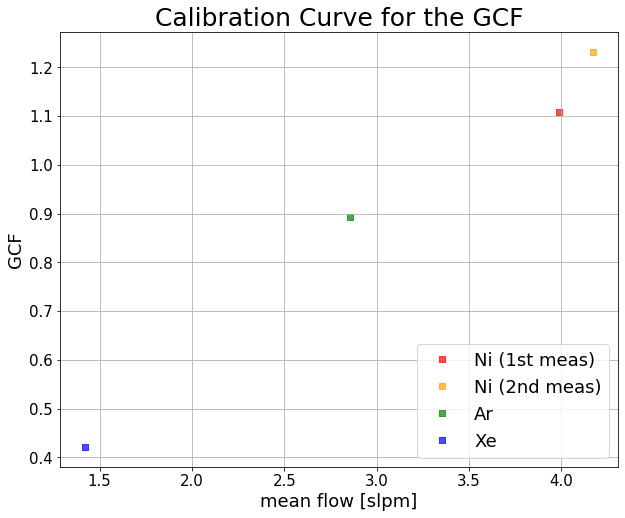

In [90]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(figsize=(10, 8))

classes = ['Ni (1st meas)', 'Ni (2nd meas)', 'Ar', 'Xe']
values = [0, 1, 2, 3]
colours = ListedColormap(['red','orange','green','blue'])
scatter = plt.scatter(mean_flow, gcf,c=values, cmap=colours, marker='s', alpha=0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=classes,loc='lower right',fontsize=18)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.xlabel('mean flow [slpm]',fontsize=18)
plt.ylabel('GCF',fontsize=18)

plt.title('Calibration Curve for the GCF', fontsize = 25)

ax.grid(True)

plt.savefig("cal_curve.png")
plt.show()